<a href="https://colab.research.google.com/github/sesidhar-7/final_proj/blob/main/EfficientNetB7_Binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install tensorflow-addons

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 8.0 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.1
    Uninstalling typeguard-4.4.1:
      Successfully uninstalled typeguard-4.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.4.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [5]:
pip install tensorflow==2.12.0 tensorflow-addons==0.20.0


INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 79.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 9.2 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
 

In [1]:
from tensorflow.keras.applications import DenseNet201, densenet,EfficientNetB7
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os
import numpy as np
import seaborn as sns
from tensorflow_addons.metrics import CohenKappa, F1Score

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [2]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [3]:
import kagglehub



In [4]:
TARGET_SIZE = (128, 128)
BATCH_SIZE = 16
# Download latest version
ROOT_DIRECTORY = kagglehub.dataset_download("sabari50312/fundus-pytorch")

print("Path to dataset files:", ROOT_DIRECTORY)
#ROOT_DIRECTORY = '/kaggle/input/fundus-pytorch'
LR = 0.0001
epochs = 20
fine_tuning_epochs = 20
total_epochs = epochs

100%|██████████| 3.82G/3.82G [02:58<00:00, 23.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/sabari50312/fundus-pytorch/versions/1


In [5]:
#read images
def read_dataset(path):
    datagen = ImageDataGenerator(rescale = 1./255)

    train_dataset = datagen.flow_from_directory(os.path.join(path, "train"), target_size = TARGET_SIZE, batch_size = BATCH_SIZE, class_mode = 'binary')
    test_dataset = datagen.flow_from_directory(os.path.join(path, "test"), target_size = TARGET_SIZE, batch_size = BATCH_SIZE, class_mode = 'binary')
    val_dataset = datagen.flow_from_directory(os.path.join(path, "val"), target_size = TARGET_SIZE, batch_size = BATCH_SIZE, class_mode = 'binary')

    return train_dataset, test_dataset, val_dataset

In [6]:
train_dataset, test_dataset, val_dataset = read_dataset(ROOT_DIRECTORY)

Found 8621 images belonging to 2 classes.
Found 2874 images belonging to 2 classes.
Found 5747 images belonging to 2 classes.


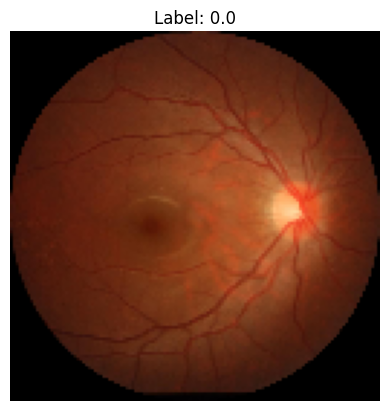

In [7]:

images, labels = next(train_dataset)

# Print the first image
plt.imshow(images[0])
plt.title("Label: " + str(labels[0]))
plt.axis('off')
plt.show()

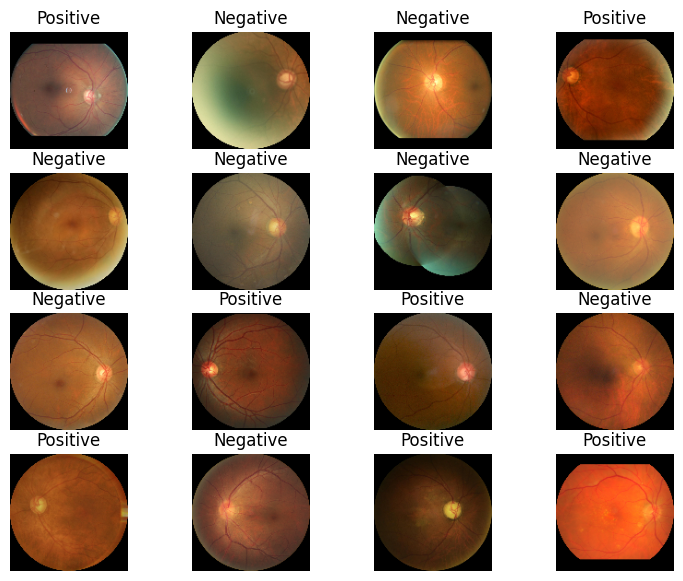

In [8]:
batch = next(train_dataset)
images, labels = batch

n_cols = 4
n_rows = 4

fig, ax = plt.subplots(n_rows, n_cols, figsize = (9, 7))
for i in range(n_rows):
    for j in range(n_cols):
        ax[i][j].imshow(images[i * n_cols + j])
        ax[i][j].set_title("Positive" if labels[i * n_cols + j] == 1.0 else "Negative")
        ax[i][j].axis("off")
plt.show()

In [9]:
!pip install -q efficientnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 81.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cupy-cuda12x 12.2.0 requires numpy<1.27,>=1.20, but you have numpy 2.2.1 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.1 which is incompatible.
langchain 0.3.12 requires numpy<2,>=1.22.4; python_version < "3.12", but you have numpy 2.2.1 which is incompatible.
matplotlib 3.8.0 requires numpy<2,>=1.21, but you have numpy 2.2.1 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.1 which is incompatible.
pytensor 2.26.4 requires numpy<2,>=1.17.0, but you have numpy 2.2.1 which is incompatible.
tensorflow 2.12.

In [13]:
strategy = tf.distribute.MirroredStrategy()

with strategy.scope():
    print("Building model...\n")
    base_model = EfficientNetB7(include_top = False, weights = 'imagenet',input_shape =(128, 128, 3))

    base_model.trainable = True

    model = tf.keras.Sequential()

    model.add(base_model)
    model.add(tf.keras.layers.GlobalAveragePooling2D())
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(128, activation = 'relu'))
    model.add(tf.keras.layers.Dense(32, activation = 'relu'))
    model.add(tf.keras.layers.Dense(8, activation = 'relu'))
    model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))


    model.summary()


    metrics = [
       tf.keras.metrics.TruePositives(name = 'tp'),
        tf.keras.metrics.TrueNegatives(name = 'tn'),
        tf.keras.metrics.FalsePositives(name = 'fp'),
        tf.keras.metrics.FalseNegatives(name = 'fn'),
        tf.keras.metrics.BinaryAccuracy(name = 'acc'),
        tf.keras.metrics.Recall(name = 'r'),
        tf.keras.metrics.Precision(name = 'p'),
        F1Score(num_classes = 2, threshold = 0.5, average='micro', name = 'F1')
    ]

    callbacks = [tf.keras.callbacks.ReduceLROnPlateau(factor = 0.3)]

    print("Compiling...\n")

    model.compile(
        optimizer = tf.keras.optimizers.Adam(learning_rate = LR),
        loss = tf.keras.losses.BinaryCrossentropy(),
        metrics = metrics,
    )
    print("Finished!\n")

    print("Fitting...\n")
    history_fit = model.fit(
        train_dataset,
        validation_data = val_dataset,
        batch_size = BATCH_SIZE,
        epochs = 2,
        verbose = 1,
        callbacks = callbacks,
        shuffle = True,
        initial_epoch = 0,
    )
    print("Finished!\n")

Building model...

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb7 (Functional)  (None, 4, 4, 2560)       64097687  
                                                                 
 global_average_pooling2d_1   (None, 2560)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 2560)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               327808    
                                                                 
 dense_5 (Dense)             (None, 32)                4128      
                                                                 
 dense_6 (Dense)             (None, 8)                 264       
                                   

In [14]:
import efficientnet.tfkeras as ef

In [15]:
results = model.evaluate(test_dataset)

180/180 [==============================] - 436s 2s/step - loss: 0.7133 - tp: 1068.0000 - tn: 899.0000 - fp: 855.0000 - fn: 52.0000 - acc: 0.6844 - r: 0.9536 - p: 0.5554 - F1: 0.7019


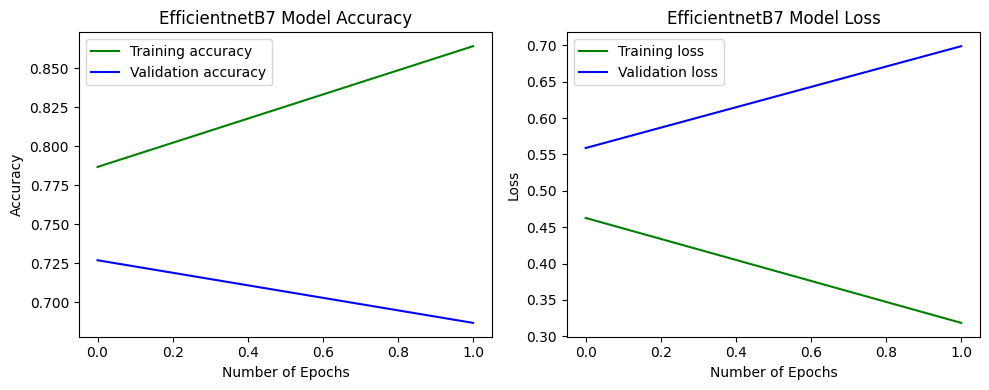

In [16]:
loss_train = history_fit.history['loss']
loss_val = history_fit.history['val_loss']
accuracy_train = history_fit.history['acc']
accuracy_val = history_fit.history['val_acc']

plt.figure(figsize=(10, 4))
# Plotting loss curve
plt.subplot(1, 2, 1)
plt.title('EfficientnetB7 Model Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.plot(accuracy_train, 'g', label='Training accuracy')
plt.plot(accuracy_val, 'b', label='Validation accuracy')
plt.legend()

# Plotting accuracy curve
plt.subplot(1, 2, 2)

plt.title('EfficientnetB7 Model Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.plot(loss_train, 'g', label='Training loss')
plt.plot(loss_val, 'b', label='Validation loss')
plt.legend()

plt.tight_layout()  # To adjust the spacing between subplots

# Set the height and width of the plot


plt.show()

In [17]:
confusion_matrix = [
    [results[2], results[4]],
    [results[3], results[1]],
]

Text(50.722222222222214, 0.5, 'True Label')

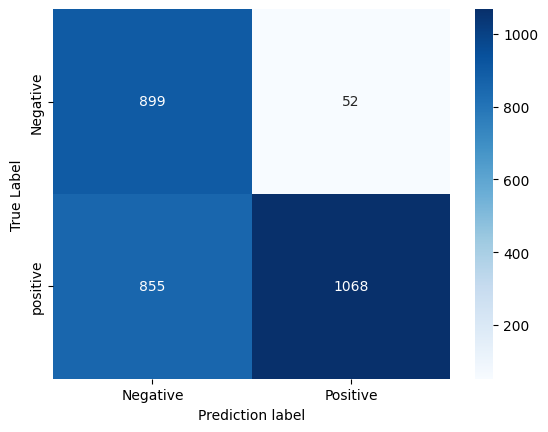

In [18]:
sns.heatmap(confusion_matrix, annot = True, fmt = ".0f", cmap = 'Blues', xticklabels = ["Negative", "Positive"], yticklabels = ["Negative", "positive"])
plt.xlabel("Prediction label")
plt.ylabel("True Label")